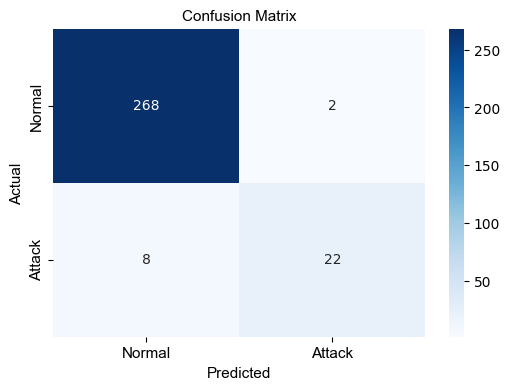

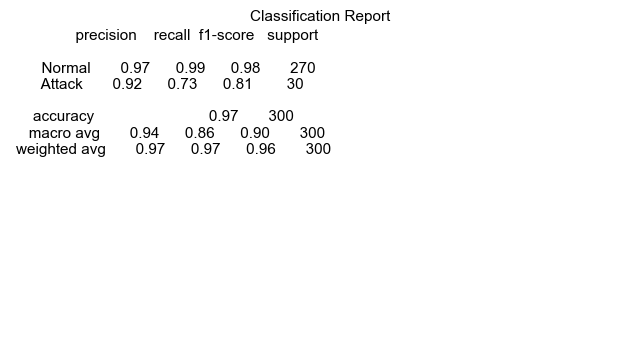

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns

# Load dataset
file_path = "C:\\Users\\as310\\Downloads\\output_data.xlsx"
data = pd.read_excel(file_path, sheet_name="Sheet1")

# Extract features
X = data[["Voltage", "Angle"]].values

# Inject FDI Attack (randomly modify 10% of data)
np.random.seed(42)
attack_indices = np.random.choice(len(X), size=int(0.1 * len(X)), replace=False)
X[attack_indices, 0] += np.random.uniform(-0.1, 0.1, size=len(attack_indices))  # Voltage
X[attack_indices, 1] += np.random.uniform(-5, 5, size=len(attack_indices))  # Angle

# Create Labels (0 = Normal, 1 = Attack)
y = np.zeros(len(X))
y[attack_indices] = 1  # Mark attacked data as 1

# Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Compute class weights to handle imbalance
class_weights = compute_class_weight("balanced", classes=np.unique(y), y=y)
weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, class_weight=weights_dict, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted", fontsize=11, fontname='Arial')
plt.ylabel("Actual", fontsize=11, fontname='Arial')
plt.title("Confusion Matrix", fontsize=11, fontname='Arial')
plt.xticks(fontsize=11, fontname='Arial')
plt.yticks(fontsize=11, fontname='Arial')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=["Normal", "Attack"])
plt.figure(figsize=(8, 4))
plt.text(0.01, 1, str(report), {'fontsize': 11, 'fontname': 'Arial'}, verticalalignment='top')
plt.axis("off")
plt.title("Classification Report", fontsize=11, fontname='Arial')
plt.show()